<a href="https://colab.research.google.com/github/yuji-sgs/media-optimization/blob/main/CTA_improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# „ÅØ„Åò„ÇÅ„Å´
## Êú¨„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„ÅÆÁõÆÁöÑ
**„É°„Éá„Ç£„Ç¢„ÅÆCTA„ÇíÊîπÂñÑ„Åó„ÅüÈöõ„ÅÆÂÆöÈáèÁöÑË©ï‰æ°„ÇíË°å„ÅÑ„ÄÅÊÑèÂë≥„ÅÆ„ÅÇ„ÇãÊîπÂñÑ„ÇíË°å„ÅÜ„ÄÇ**

In [1]:
# ÂøÖË¶Å„Å™„É¢„Ç∏„É•„Éº„É´„ÅÆË™≠„ÅøËæº„Åø
import numpy as np
from matplotlib import pyplot as plt
import pymc as pm
plt.style.use('grayscale')
plt.style.use('seaborn-whitegrid')
np.random.seed(0)

<ipython-input-1-e7cb73c55926>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Ë°®Á§∫ÂõûÊï∞„Å´ÂØæ„Åô„Çã„ÇØ„É™„ÉÉ„ÇØÊï∞„ÅÆ‰∫ãÂæåÂàÜÂ∏É„ÅÆÂèØË¶ñÂåñÔºÜÂÆöÈáèÁöÑË©ï‰æ°Ôºà„Çµ„É≥„Éó„É´„Ç±„Éº„ÇπÔºâ

In [2]:
N = 40  # Ë°®Á§∫Êï∞(‰ªÆ)
a = 2   # „ÇØ„É™„ÉÉ„ÇØÊï∞Ôºà‰ªÆÔºâ

with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1)
  obs = pm.Binomial('a', p=theta, n=N, observed=a)
  trace = pm.sample(5000, chains=2)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


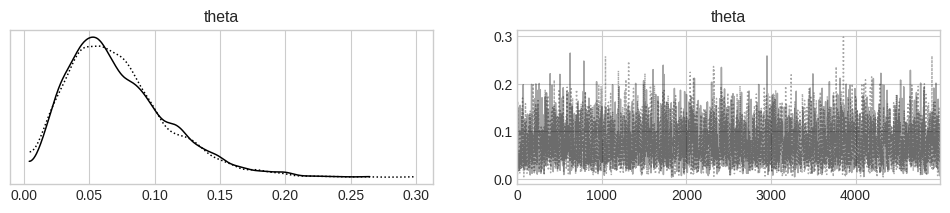

In [3]:
# ‰∫ãÂæåÂàÜÂ∏É„Åã„Çâ„ÅÆ„Çµ„É≥„Éó„É´„ÅÆÂèØË¶ñÂåñ
with model:
  pm.plot_trace(trace)

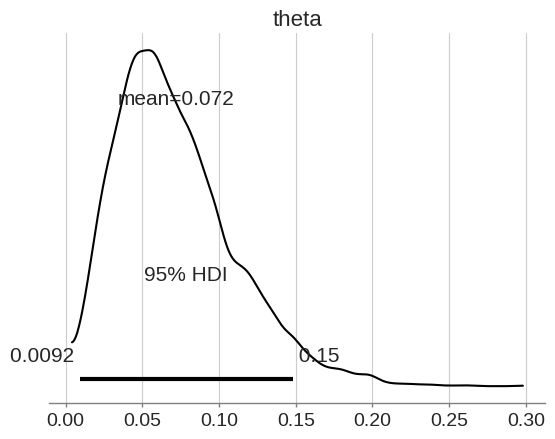

In [4]:
with model:
  pm.plot_posterior(trace, hdi_prob=0.95)

In [7]:
# ‰ªÆË™¨ÔºöË°®Á§∫Êï∞„Å´ÂØæ„Åô„Çã„ÇØ„É™„ÉÉ„ÇØÁéá„ÅØ1ÔºÖ‰ª•‰∏ä„Åß„ÅÇ„Çã„ÄÇ
# ÂÆöÈáèÁöÑË©ï‰æ°ÔºöÊñ∞„Åü„Å™Á¢∫ÁéáÂ§âÊï∞ùõø=Œ∏-0.01„ÅÆ„Çµ„É≥„Éó„É´„Åå95%„ÅÆÁ¢∫Áéá„ÅßÊ≠£„Å´„Å™„Çã„ÄÇ
theta_samples = trace.posterior['theta'].values.flatten()
print((theta_samples - 0.01 > 0).mean())

0.9924


## 2„Å§„ÅÆË°®Á§∫ÂõûÊï∞„Å´ÂØæ„Åô„Çã„ÇØ„É™„ÉÉ„ÇØÊï∞„ÅÆ„Éá„Éº„Çø„Åå„ÅÇ„Çä„ÄÅ„Åù„Çå„Çâ„ÅÆ‰∫ãÂæåÂàÜÂ∏É„ÅÆÂèØË¶ñÂåñÔºÜÂÆöÈáèÁöÑË©ï‰æ°Ôºà„Çµ„É≥„Éó„É´„Ç±„Éº„ÇπÔºâ

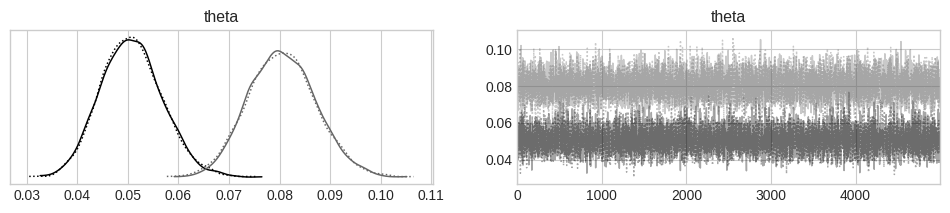

In [8]:
plan_A = [1280, 64] # [Ë°®Á§∫ÂõûÊï∞, „ÇØ„É™„ÉÉ„ÇØÊï∞]
plan_B = [1600, 128] # [Ë°®Á§∫ÂõûÊï∞, „ÇØ„É™„ÉÉ„ÇØÊï∞]

with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
  obs = pm.Binomial('obs', p=theta, n=[plan_A[0], plan_B[0]], observed=[plan_A[1], plan_B[1]])
  trace = pm.sample(5000, chains=2)
  pm.plot_trace(trace, ['theta'], compact=True)

In [10]:
# ‰ªÆË™¨ÔºöBÊ°à„ÅÆ„ÇØ„É™„ÉÉ„ÇØÁéá„ÅØAÊ°à„Çà„Çä„ÇÇÂ§ß„Åç„ÅÑ
# ÂÆöÈáèÁöÑË©ï‰æ°ÔºöÊñ∞„Åü„Å™Á¢∫ÁéáÂ§âÊï∞ùõø=Œ∏B-Œ∏A„ÅÆ„Çµ„É≥„Éó„É´„Åå95%„ÅÆÁ¢∫Áéá„ÅßÊ≠£„ÅÆÂÄ§„Å´„Å™„Çã
theta_A = trace.posterior['theta'].sel(theta_dim_0=0).values.flatten()
theta_B = trace.posterior['theta'].sel(theta_dim_0=1).values.flatten()
print((theta_B - theta_A > 0).mean())

0.9996
